
-----------Linear SVM:-----------
[[137   4]
 [  2 132]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       141
           1       0.97      0.99      0.98       134

   micro avg       0.98      0.98      0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275


-----------Polynomial Kernel:-----------
[[10  0  0]
 [ 0  9  0]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.82      1.00      0.90         9
 Iris-virginica       1.00      0.82      0.90        11

      micro avg       0.93      0.93      0.93        30
      macro avg       0.94      0.94      0.93        30
   weighted avg       0.95      0.93      0.93        30


-----------Gaussian Kernel:-----------
[[10  0  0]
 [ 0  9  0]
 [ 0  1 10]]
                 precision    recall  f1-score   support


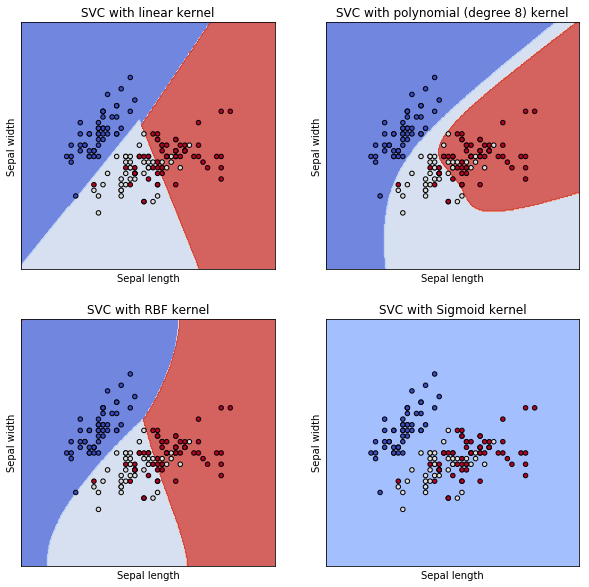

In [20]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

def linear_svm():
    # download data set: https://drive.google.com/file/d/13nw-uRXPY8XIZQxKRNZ3yYlho-CYm_Qt/view
    # info: https://archive.ics.uci.edu/ml/datasets/banknote+authentication

    # load data
    bankdata = pd.read_csv("./tmp/bill_authentication.csv")

    # see the data
    bankdata.shape

    # see head
    bankdata.head()

    # data processing
    X = bankdata.drop('Class', axis=1)
    y = bankdata['Class']

    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

    # train the SVM
    from sklearn.svm import SVC
    svclassifier = SVC(kernel='linear')
    svclassifier.fit(X_train, y_train)

    # predictions
    y_pred = svclassifier.predict(X_test)

    # Evaluate model
    from sklearn.metrics import classification_report, confusion_matrix
    print("\n-----------Linear SVM:-----------")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    return svclassifier


# Iris dataset  https://archive.ics.uci.edu/ml/datasets/iris4
def import_iris():
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

    # Assign colum names to the dataset
    colnames = ['sepal-length', 'sepal-width',
                'petal-length', 'petal-width', 'Class']

    # Read dataset to pandas dataframe
    irisdata = pd.read_csv(url, names=colnames)

    # process
    X = irisdata.drop('Class', axis=1)
    y = irisdata['Class']

    # train
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
    return X_train, X_test, y_train, y_test, X, y


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


def polynomial_kernel(X_train, X_test, y_train, y_test):
    from sklearn.svm import SVC
    poly_svc = SVC(kernel='poly', degree=8, gamma='scale', random_state=42)
    poly_svc.fit(X_train, y_train)

    # predictions
    y_pred = poly_svc.predict(X_test)

    # Evaluate model
    from sklearn.metrics import classification_report, confusion_matrix
    print("\n-----------Polynomial Kernel:-----------")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    return poly_svc


def gaussian_kernel(X_train, X_test, y_train, y_test):
    from sklearn.svm import SVC
    gaussian_svc = SVC(kernel='rbf', random_state=42)
    gaussian_svc.fit(X_train, y_train)

    # predictions
    y_pred = gaussian_svc.predict(X_test)

    # Evaluate model
    from sklearn.metrics import classification_report, confusion_matrix
    print("\n-----------Gaussian Kernel:-----------")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    return gaussian_svc


def sigmoid_kernel(X_train, X_test, y_train, y_test):
    from sklearn.svm import SVC
    sigmoid_svc = SVC(kernel='sigmoid', gamma=2, random_state=42)
    sigmoid_svc.fit(X_train, y_train)

    # predictions
    y_pred = sigmoid_svc.predict(X_test)

    # Evaluate model
    from sklearn.metrics import classification_report, confusion_matrix
    print("\n-----------Sigmoid Kernel:-----------")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    return sigmoid_svc


def test():
    
    X_train, X_test, y_train, y_test, X, y = import_iris()
    linear_svc = linear_svm()
    poly_svc = polynomial_kernel(X_train, X_test, y_train, y_test)
    gaussian_svc = gaussian_kernel(X_train, X_test, y_train, y_test)
    sigmoid_svc = sigmoid_kernel(X_train, X_test, y_train, y_test)

    models = (linear_svc,
              poly_svc,
              gaussian_svc,
              sigmoid_svc)

    X = X.drop('petal-width', axis=1)
    X = X.drop('petal-length', axis=1)
    X = np.asarray(X)
    y = pd.Categorical(y).codes
    models = (clf.fit(X, y) for clf in models)

    # title for the plots
    titles = ('SVC with linear kernel',
              'SVC with polynomial (degree 8) kernel',
              'SVC with RBF kernel',
              'SVC with Sigmoid kernel')
    plot_figures(models, titles, X, y)

def plot_figures(models, titles, X, y):
    # Set-up 2x2 grid for plotting.
    fig, sub = plt.subplots(nrows = 2, ncols=2, figsize=(10, 10))
    plt.subplots_adjust(wspace=0.2, hspace=0.2)

    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)

    for clf, title, ax in zip(models, titles, sub.flatten()):
        plot_contours(ax, clf, xx, yy,
                      cmap=plt.cm.coolwarm, alpha=0.8)
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xlabel('Sepal length')
        ax.set_ylabel('Sepal width')
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(title)
    plt.show()


test()
